# Project: data science medthod on adastar data set
## Description
## Import all necessary libraries
__**Pandas:**__ import and cleaning data set  
__**Numpy:**__ organize numeric value  
__**Seaborn:**__ visulization the statistic  
__**Sklearn:**__ split data set to train dataset and test dataset. train/ test model  
__**time:**__ use to convert string to datetime  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
import datetime

In [2]:
#import dataset
init_dataset = pd.read_csv("02-Dataset v0.02.csv")
print(init_dataset)
print(init_dataset.dtypes)
#Structured time
# t = time.strptime(init_dataset.timest[0], "%Y-%m-%d %H:%M:%S")


timest  station  param   level isinvalid
0        2016-01-20 16:00:00      1.0      1   81.79         0
1        2016-01-20 16:00:00      2.0      1  106.47         0
2        2016-01-20 16:00:00      3.0      1  121.81         0
3        2016-01-20 16:00:00      4.0      1  140.35         0
4        2016-01-20 16:00:00      5.0      1   25.27         0
...                      ...      ...    ...     ...       ...
1252194  2018-06-19 10:00:00      5.0     10    0.00         0
1252195  2018-06-19 10:00:00      5.0     11    0.00         0
1252196  2018-06-19 10:00:00      6.0      9    0.00         0
1252197  2018-06-19 10:00:00      6.0     10    0.00         0
1252198  2018-06-19 10:00:00      6.0     11    0.00         0

[1252199 rows x 5 columns]
timest        object
station      float64
param          int64
level        float64
isinvalid     object
dtype: object


In [3]:
init_dataset.isnull().sum()

timest       0
station      1
param        0
level        1
isinvalid    0
dtype: int64

In [4]:
# Clean data
dataset = init_dataset.dropna()
print(dataset.isnull().sum())
# Get only valid data and corrected data
dataset = dataset.loc[dataset.isinvalid==0]
dataset = dataset.loc[(0 <= dataset.station) & (6 >= dataset.station)]
dataset = dataset.loc[(0 <= dataset.param) & (11 >= dataset.param)]
dataset = dataset.reset_index()
dataset = dataset.drop(columns=['index'])
print()
print("isinvalid:", dataset.isinvalid.unique())
print("station:", dataset.station.unique())
print("param:", dataset.param.unique())

timest       0
station      0
param        0
level        0
isinvalid    0
dtype: int64

isinvalid: [0]
station: [1. 2. 3. 4. 5. 6.]
param: [ 1  2  8  3  4  5  7  6  9 10 11  0]


In [5]:
# convert data type
dataset.station = dataset.station.astype(int)
date = []
for i in range(len(dataset.timest)):
    time = dataset.timest[i]
    try:
        t = datetime.datetime.strptime(time, "%Y-%m-%d %H:%M:%S")
        date.append(t.date())
    except ValueError:
        try:
            t = datetime.datetime.strptime(time, "%Y-%b-%d %H:%M:%S")
            date.append(t.date())
        except ValueError:
            date.append(None)
dataset['date'] = date

In [6]:
cleaned_df = dataset.dropna()
cleaned_df = cleaned_df.reset_index()
cleaned_df = cleaned_df.drop(columns=['index', 'timest', 'isinvalid'])
print(cleaned_df)
print()
print(cleaned_df.isnull().sum())
print("station:", cleaned_df.station.unique())
print("param:", cleaned_df.param.unique())

station  param   level        date
0              1      1   81.79  2016-01-20
1              2      1  106.47  2016-01-20
2              3      1  121.81  2016-01-20
3              4      1  140.35  2016-01-20
4              5      1   25.27  2016-01-20
...          ...    ...     ...         ...
1170204        6     10    0.00  2018-05-02
1170205        6     11    0.00  2018-05-02
1170206        1      1   22.79  2018-05-02
1170207        1      2    2.51  2018-05-02
1170208        1      8  944.10  2018-05-02

[1170209 rows x 4 columns]

station    0
param      0
level      0
date       0
dtype: int64
station: [1 2 3 4 5 6]
param: [ 1  2  8  3  4  5  7  6  9 10 11  0]


In [7]:
grouped_df = cleaned_df.groupby(['param'])
pm = grouped_df.get_group(0).groupby(['date', 'station']).mean().reset_index().drop(columns=['param'])
# NO2 = grouped_df.get_group(1).groupby(['date', 'station']).mean().reset_index().drop(columns=['param'])
# NO = grouped_df.get_group(2).groupby(['date', 'station']).mean().reset_index().drop(columns=['param'])
# C6H6 = grouped_df.get_group(3).groupby(['date', 'station']).mean().reset_index().drop(columns=['param'])
# CO = grouped_df.get_group(4).groupby(['date', 'station']).mean().reset_index().drop(columns=['param'])
# O3 = grouped_df.get_group(5).groupby(['date', 'station']).mean().reset_index().drop(columns=['param'])
# SO2 = grouped_df.get_group(6).groupby(['date', 'station']).mean().reset_index().drop(columns=['param'])
Himidity = grouped_df.get_group(7).groupby(['date', 'station']).mean().reset_index().drop(columns=['param'])
Himidity.rename(columns={'level':'humidity'}, inplace=True)
pressure = grouped_df.get_group(8).groupby(['date', 'station']).mean().reset_index().drop(columns=['param'])
pressure.rename(columns={'level':'pressure'}, inplace=True)
wind = grouped_df.get_group(9).groupby(['date', 'station']).mean().reset_index().drop(columns=['param'])
wind.rename(columns={'level':'wind'}, inplace=True)
sunshine = grouped_df.get_group(10).groupby(['date', 'station']).mean().reset_index().drop(columns=['param'])
sunshine.rename(columns={'level':'sunshine'}, inplace=True)
temperature = grouped_df.get_group(11).groupby(['date', 'station']).mean().reset_index().drop(columns=['param'])
temperature.rename(columns={'level':'temperature'}, inplace=True)

In [35]:
# result = pd.concat([pm, Himidity], axis=1, join='inner', copy=Fale)
# result
result = pd.merge(pm, Himidity, how='inner', on=['date', 'station'])
# result = pd.merge(result, pressure, how='inner', on=['date', 'station'])
result = pd.merge(result, wind, how='inner', on=['date', 'station'])
result = pd.merge(result, sunshine, how='inner', on=['date', 'station'])
result = pd.merge(result, temperature, how='inner', on=['date', 'station'])
result

,date,station,level,humidity,wind,sunshine,temperature
0,2016-01-20,1,240.885714,81.578750,1.18500,21.02250,-14.30625
1,2016-01-20,2,208.092500,80.636250,0.64125,36.39000,-13.49500
2,2016-01-20,3,325.902500,75.952500,0.54500,40.96375,-7.77625
3,2016-01-20,4,417.925000,74.573750,0.80750,29.53875,-8.02375
4,2016-01-20,5,16.345000,75.850000,21.03375,60.37875,-1.29000
...,...,...,...,...,...,...,...
4522,2018-05-02,1,19.512222,41.764444,0.00000,128.83100,0.00000
4523,2018-05-02,2,33.382222,65.691111,0.53700,0.00000,0.00000
4524,2018-05-02,4,44.280000,67.219000,1.39100,79.63600,13.68900
4525,2018-05-02,5,43.926000,47.626000,1.41100,123.47400,18.46100


In [36]:
def aqi_calcutator(c=0.0, c_low = 0.0, c_high = 12.0, i_low = 0.0, i_high = 50.0):
    first = (c-c_low)/(c_high-c_low)
    second = (i_high-i_low)+i_low
    return round(first * second, 1)

In [37]:
aqi = []
status = []
for level in result.level:
    level = round(level, 1)
    if 0.0 <= level <= 12.0:
        aqi.append(aqi_calcutator(level))
        status.append(int(0))
    elif 12.1 <= level <= 35.4:
         aqi.append(aqi_calcutator(level, 12.1, 35.4, 51, 100))
         status.append(int(1))
    elif 35.5 <= level <= 55.4:
         aqi.append(aqi_calcutator(level, 35.5, 55.4, 101, 150))
         status.append(int(2))
    elif 55.5 <= level <= 150.4:
         aqi.append(aqi_calcutator(level, 55.5, 150.4, 151, 200))
         status.append(int(3))
    elif 150.5 <= level <= 250.4:
         aqi.append(aqi_calcutator(level, 150.5, 250.4, 201, 300))
         status.append(int(4))
    elif 250.5 <= level <= 350.4:
         aqi.append(aqi_calcutator(level, 250.5, 350.4, 301, 400))
         status.append(int(5))
    elif 350.5 <= level <= 500.4:
         aqi.append(aqi_calcutator(level, 350.5, 500.4, 401, 500))
         status.append(int(6))
    else:
        aqi.append(0)
        status.append(None)
result['aqi'] = aqi
result['status'] = status
df = result
df = df.drop(columns=["level"])
df = df.dropna()
df = df.reset_index()
df = df.drop(columns=["index"])

In [38]:
df.status = df['status'].astype('int')
df['month'] = df['date'].apply(lambda x: x.month)
df['year'] = df['date'].apply(lambda x: x.year)
df.to_csv("cleaned_dataset.csv")
df

,date,station,humidity,wind,sunshine,temperature,aqi,status,month,year
0,2016-01-20,1,81.578750,1.18500,21.02250,-14.30625,271.5,4,1,2016
1,2016-01-20,2,80.636250,0.64125,36.39000,-13.49500,173.0,4,1,2016
2,2016-01-20,3,75.952500,0.54500,40.96375,-7.77625,301.9,5,1,2016
3,2016-01-20,4,74.573750,0.80750,29.53875,-8.02375,224.8,6,1,2016
4,2016-01-20,5,75.850000,21.03375,60.37875,-1.29000,18.0,1,1,2016
...,...,...,...,...,...,...,...,...,...,...
4521,2018-05-02,1,41.764444,0.00000,128.83100,0.00000,31.8,1,5,2018
4522,2018-05-02,2,65.691111,0.53700,0.00000,0.00000,91.4,1,5,2018
4523,2018-05-02,4,67.219000,1.39100,79.63600,13.68900,66.3,2,5,2018
4524,2018-05-02,5,47.626000,1.41100,123.47400,18.46100,63.3,2,5,2018


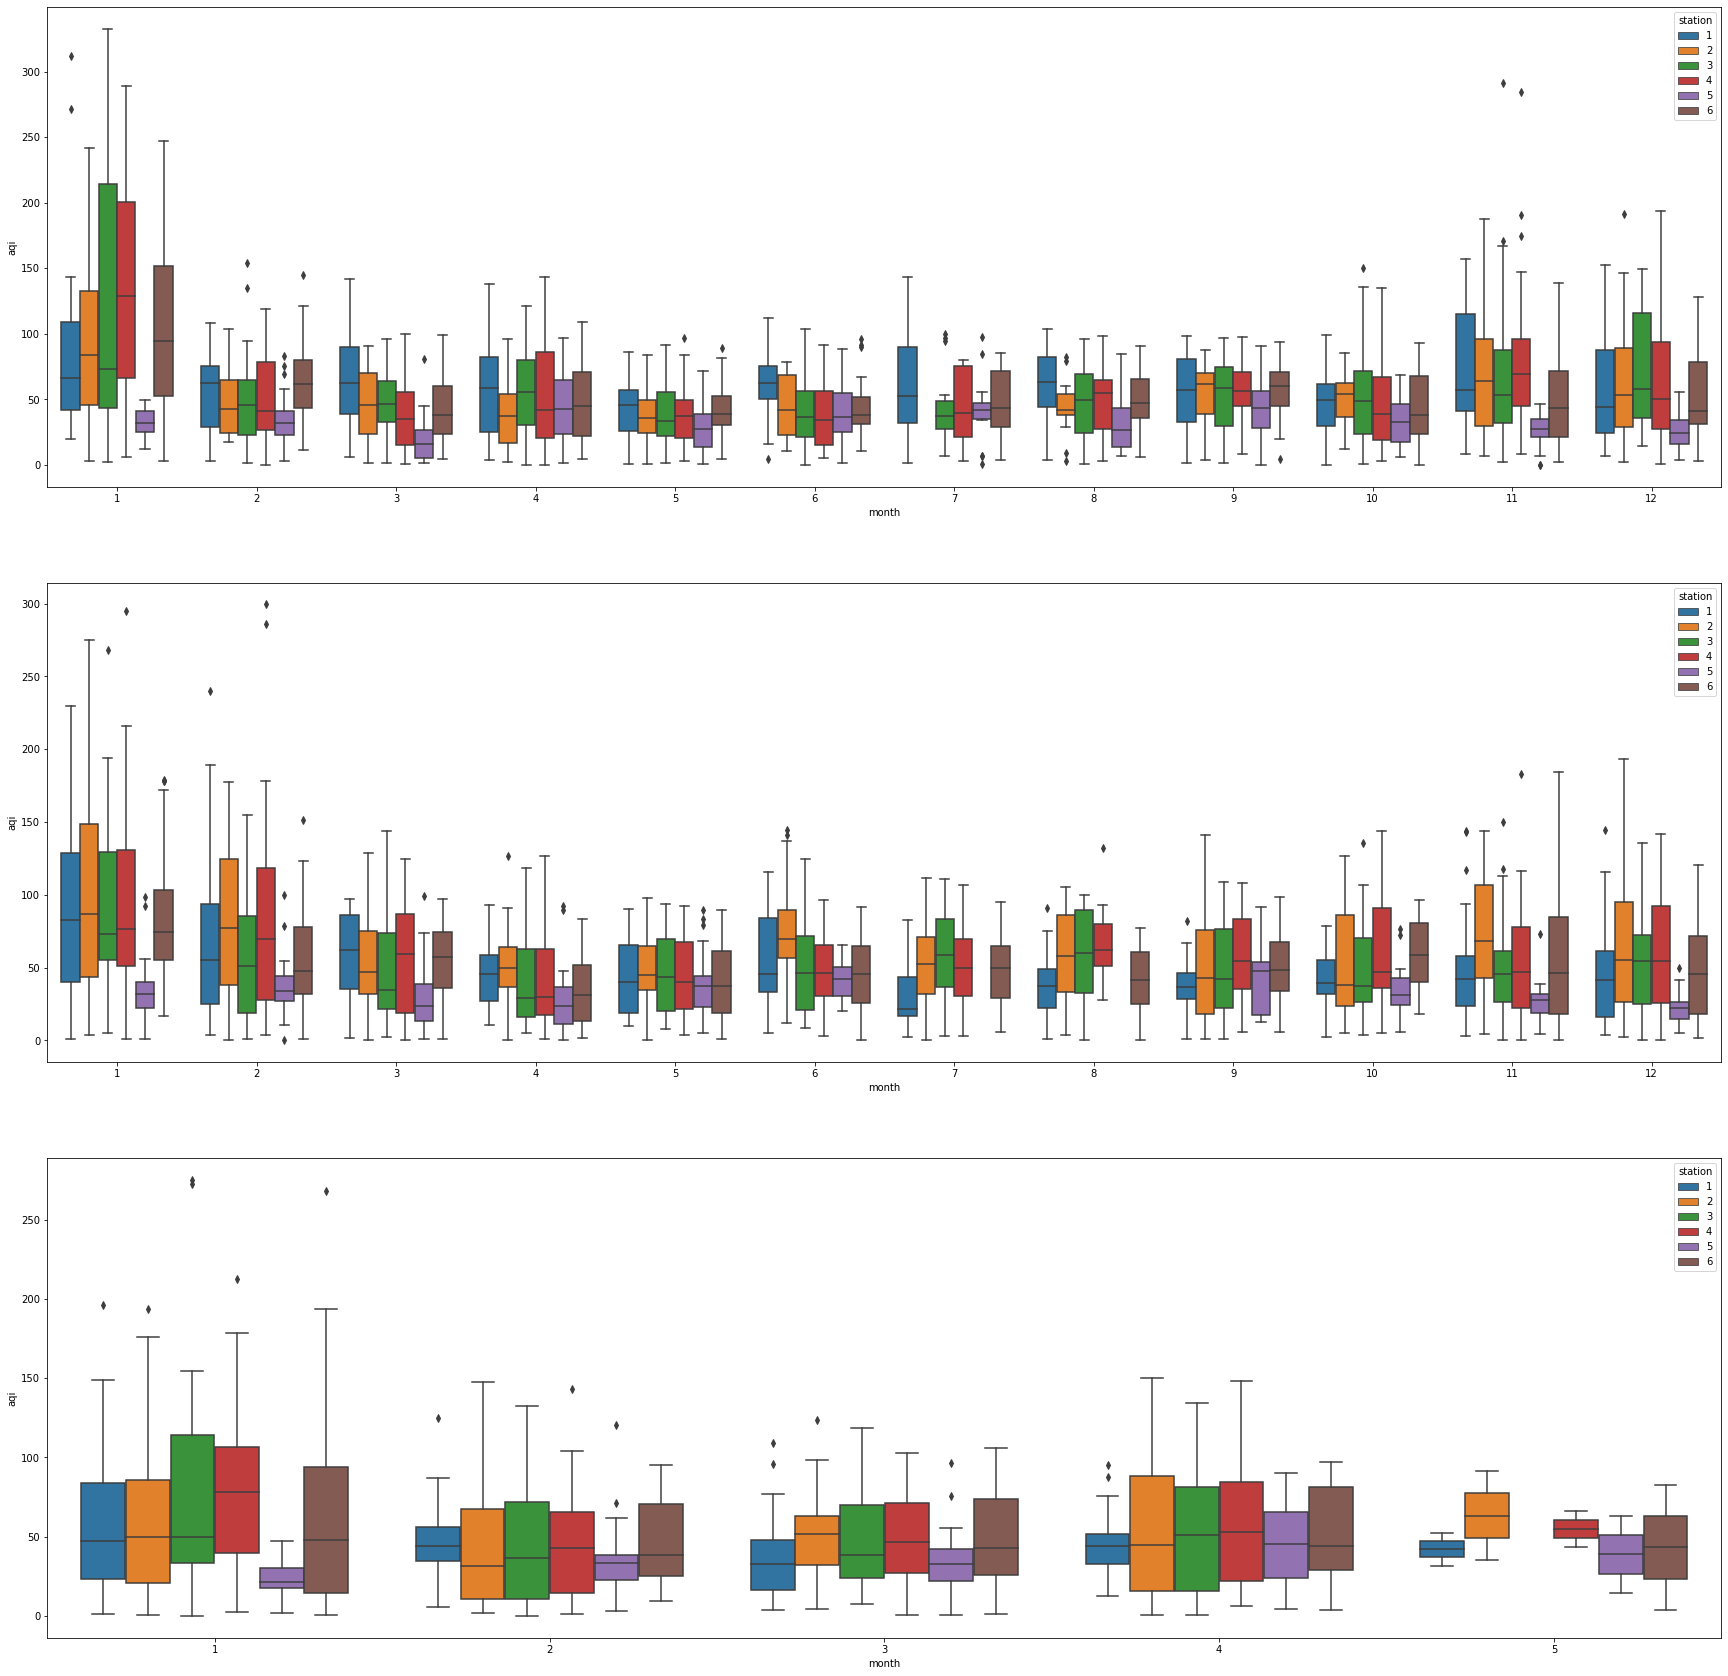

In [39]:
f, axis = plt.subplots(3, 1,figsize=(30,30))
year = df.year.unique()
position =0
for y in year:
    df_year = df.loc[df.year == y]
    sns.boxplot(x="month", y="aqi", hue= "station", data = df_year, ax = axis[position])
    position+=1

In [40]:
corr = df.corr("spearman")
corr


,station,humidity,wind,sunshine,temperature,aqi,status,month,year
station,1.000000,0.061872,0.288619,0.043569,0.032058,-0.089892,-0.169514,0.004048,-0.013503
humidity,0.061872,1.000000,0.012050,-0.377713,-0.239317,-0.010193,0.057637,-0.102734,-0.018921
wind,0.288619,0.012050,1.000000,0.065502,0.000847,-0.199063,-0.296792,-0.150556,0.107322
sunshine,0.043569,-0.377713,0.065502,1.000000,0.545501,0.037130,0.029703,-0.075809,-0.115622
temperature,0.032058,-0.239317,0.000847,0.545501,1.000000,-0.028643,-0.097350,0.147376,-0.197562
aqi,-0.089892,-0.010193,-0.199063,0.037130,-0.028643,1.000000,0.134117,-0.023249,-0.009724
status,-0.169514,0.057637,-0.296792,0.029703,-0.097350,0.134117,1.000000,-0.112504,0.028096
month,0.004048,-0.102734,-0.150556,-0.075809,0.147376,-0.023249,-0.112504,1.000000,-0.328354
year,-0.013503,-0.018921,0.107322,-0.115622,-0.197562,-0.009724,0.028096,-0.328354,1.000000


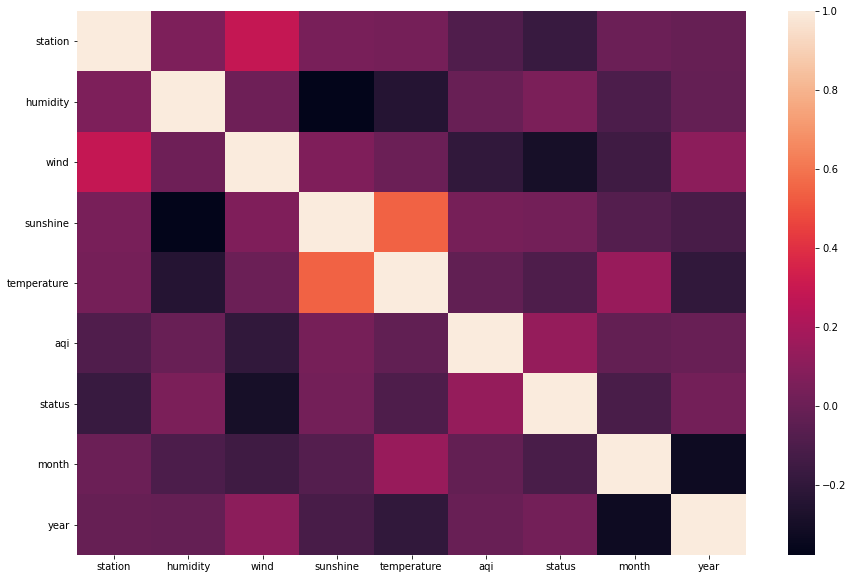

In [46]:
f, axis = plt.subplots(figsize=(15,10))
sns.heatmap(corr, ax = axis)